In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("D:/New folder/Semester 3/ADY301m/file csv/boston_housing_data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Kiểm tra giá trị bị thiếu
print(df.isnull().sum())

#Thống kê cơ bản
df.describe()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#kiểm định thống kê
# T-test
group_1= df[df["CHAS"]==1]["MEDV"]
group_2= df[df["CHAS"]==0]["MEDV"]

t_stats, p_value= stats.ttest_ind(group_1, group_2)
print(f"T-statics :{t_stats}, Value :{p_value}")

T-statics :3.996437466090509, Value :7.390623170519905e-05


In [5]:
#ANOVA
anova_result=stats.f_oneway(df[df["AGE"]<50]["MEDV"], df[df["AGE"]>+50]["MEDV"])
print(f"ANOVA value: {anova_result.pvalue}")

ANOVA value: 3.037923425981101e-11


In [6]:
#LinearRegression
X=df["NOX"]
Y=df["INDUS"]

# add_constrant
X=sm.add_constant(X)
model=sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           7.91e-98
Time:                        16:27:15   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.0

In [7]:
#tác động của biến DIS (khoảng cách trung bình đến các trung tâm việc làm) lên MEDV (giá trị trung bình của căn nhà)

x=df["DIS"]
y=df["MEDV"]

x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        16:27:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [8]:
#Kiểm tra sự khác biệt về giá nhà giữa các nhóm dựa trên tỷ lệ học sinh/giáo viên (PTRATIO) và thuế tài sản (TAX)

group1_p= df[df["PTRATIO"]>df["PTRATIO"].median()]["MEDV"]
group2_p= df[df["PTRATIO"]<=df["PTRATIO"].median()]["MEDV"]

anova_result_p=stats.f_oneway(group1_p,group2_p)
print(f"ANOVA P-value PTRATO:{anova_result_p.pvalue}")

group1_tax=df[df["TAX"] > df["TAX"].median()]["MEDV"]
group2_tax=df[df["TAX"] <= df["TAX"].median()]["MEDV"]

anova_result_tax=stats.f_oneway(group1_tax, group2_tax)
print( f"ANOVA P-value TAX:{anova_result_tax.pvalue}")

ANOVA P-value PTRATO:1.0498463281081318e-30
ANOVA P-value TAX:8.524007278763861e-19


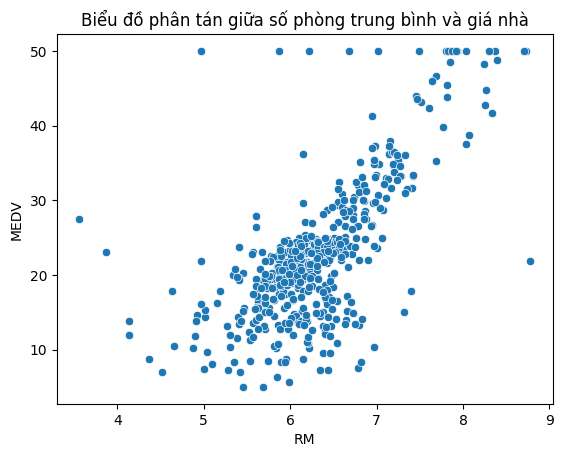

In [9]:
sns.scatterplot(x=df["RM"], y=df["MEDV"], data=df)
plt.title("Biểu đồ phân tán giữa số phòng trung bình và giá nhà");

In [10]:
# Xây dựng mô hình hồi quy tuyến tính dựa trên các biến RM và LSTAT để dự đoán giá nhà (MEDV)
x=df[["RM", "LSTAT"]]
y=df["MEDV"]

x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          7.01e-112
Time:                        16:27:15   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

In [18]:
#Thực hiện chuẩn hóa dữ liệu trước khi xây dựng mô hình hồi quy
scaler= StandardScaler()
X_scaler=scaler.fit_transform(df[["RM","LSTAT"]])

X_scaler=sm.add_constant(X_scaler)
model_scaled=sm.OLS(df["MEDV"], X_scaler).fit()
print(model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          7.01e-112
Time:                        19:14:06   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.246     91.487      0.0

In [19]:
print(df[["RM","LSTAT"]])
print("------")
print(X_scaler)

        RM  LSTAT
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    7.147   5.33
..     ...    ...
501  6.593   9.67
502  6.120   9.08
503  6.976   5.64
504  6.794   6.48
505  6.030   7.88

[506 rows x 2 columns]
------
[[ 1.          0.41367189 -1.0755623 ]
 [ 1.          0.19427445 -0.49243937]
 [ 1.          1.28271368 -1.2087274 ]
 ...
 [ 1.          0.98496002 -0.98304761]
 [ 1.          0.72567214 -0.86530163]
 [ 1.         -0.36276709 -0.66905833]]
